In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/question-pairs-dataset/questions.csv


In [2]:
df=pd.read_csv('/kaggle/input/question-pairs-dataset/questions.csv')

In [3]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,404348,789796,789797,What is one coin?,What's this coin?,0
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [4]:
df.shape

(404351, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

AS we can see we have large dataset and few only is null


is_duplicate
0    255045
1    149306
Name: count, dtype: int64
is_duplicate
0    63.07515
1    36.92485
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

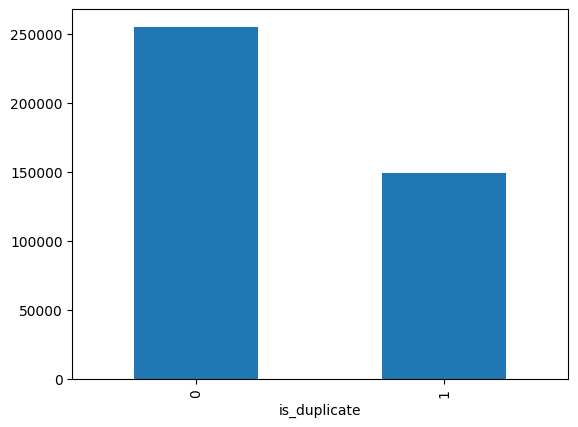

In [7]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [8]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("NO of unique questions",np.unique(qid).shape[0])
x=qid.value_counts()>1
print('NO of repeated questions',x[x].shape[0])

NO of unique questions 789801
NO of repeated questions 13698


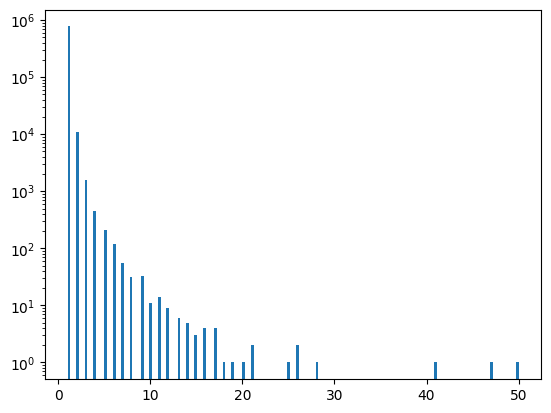

In [9]:
import matplotlib.pyplot as plt
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

AS we can 0 times repeated have 10 ki power 6 and there are 

In [10]:
import seaborn as sns
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [11]:
new_df=df.sample(40000,random_state=2)

In [12]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0
...,...,...,...,...,...,...
13418,13418,26788,26789,How did you make friends on Quora?,Can you make online friends with other people ...,1
69533,69533,138210,138211,Why has Quora flagged this question as needing...,Why does Quora always mark my questions as nee...,1
333924,333924,654741,654742,What are your views on the Indian claim of sur...,What do you think of India’s surgical strikes ...,0
277725,277725,546041,546042,Is violence the reaction to the knowledge of u...,Where has soul come from and where does it go ...,0


In [13]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    


In [14]:
preprocess("I've already make a deal! <b>where</b> were you</b>?")

'i have already make a deal  where were you'

In [15]:
new_df['question1']=new_df['question1'].apply(preprocess)
new_df['question2']=new_df['question2'].apply(preprocess)

In [16]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs,0


In [17]:
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [18]:
new_df['q1_num_words']=new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row: len(row.split(" ")))

In [19]:
def common_word(row):
    w1 = set(word.lower().strip() for word in row['question1'].split(" "))
    w2 = set(word.lower().strip() for word in row['question2'].split(" "))
    return len(w1 & w2)

In [20]:
new_df['word_common']=new_df.apply(common_word,axis=1)

In [21]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8,6
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,104,11,23,3
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,123,122,42,42,18
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,6
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs,0,53,39,11,9,6


In [22]:
def total_words(row):
    w1=set(word.lower().strip() for word in row['question1'].split(" "))
    w2=set(word.lower().strip() for word in row['question2'].split(" "))
    return (len(w1)+len(w2))

In [23]:
new_df['word_total']=new_df.apply(total_words,axis=1)

In [24]:
new_df['share-word']=round(new_df['word_common']/new_df['word_total'],4)

In [25]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,share-word
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8,6,19,0.3158
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,104,11,23,3,33,0.0909
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,123,122,42,42,18,38,0.4737
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,6,18,0.3333
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs,0,53,39,11,9,6,20,0.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,13418,26788,26789,how did you make friends on quora,can you make online friends with other people ...,1,33,54,7,10,5,17,0.2941
69533,69533,138210,138211,why has quora flagged this question as needing...,why does quora always mark my questions as nee...,1,58,62,9,10,5,19,0.2632
333924,333924,654741,654742,what are your views on the indian claim of sur...,what do you think of india s surgical strikes ...,0,94,92,17,16,6,32,0.1875
277725,277725,546041,546042,is violence the reaction to the knowledge of u...,where has soul come from and where does it go ...,0,55,76,9,15,1,21,0.0476


In [26]:

# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    #safe_div so that denominator never becomes 0
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV) #cwc_min
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)  #cwc_max
    
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)  #csc_min
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)  #csc_max
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV) #ctc_min
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)  #ctc_max
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [27]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))


In [28]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=c100239d262272ea5b28c4589262a1e26e5a7623d3baa4c8c1186c3e36f71793
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [29]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    

In [30]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))


In [31]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8,...,0.666656,0.666644,0.399992,0.749991,0.545450,0.0,1.0,3.0,9.5,0.309524
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,104,11,23,...,0.000000,0.499992,0.272725,0.272725,0.136363,0.0,0.0,11.0,16.5,0.115385
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,123,122,42,42,...,0.923070,0.999980,0.999980,0.708330,0.708330,1.0,1.0,0.0,24.0,0.593496
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,...,0.599988,0.749981,0.599988,0.749991,0.599994,0.0,1.0,2.0,9.0,0.355556
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs,0,53,39,11,9,...,0.599988,0.599988,0.499992,0.666659,0.545450,0.0,1.0,2.0,10.0,0.400000


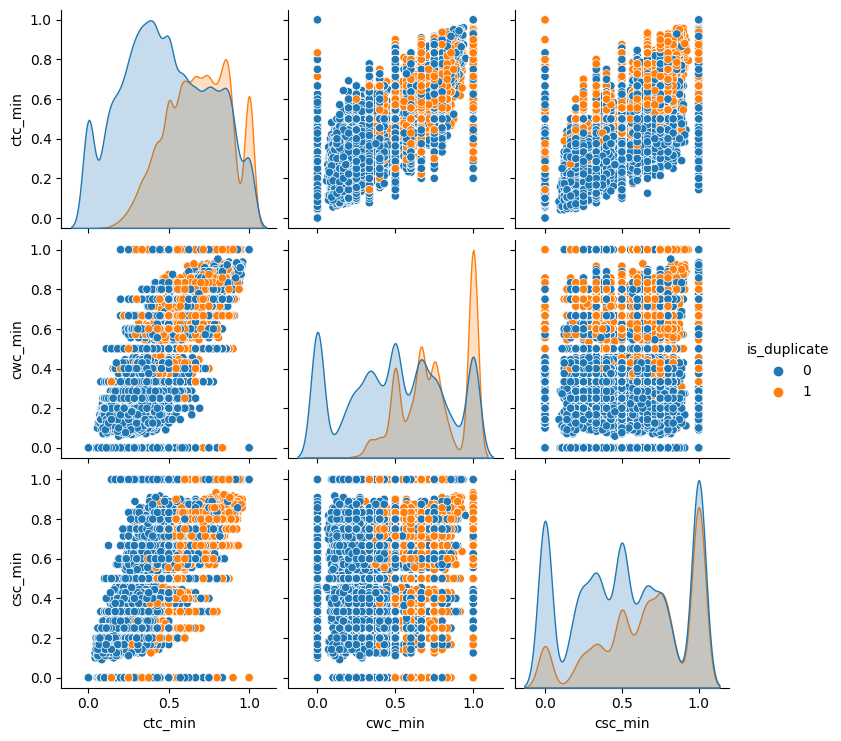

In [32]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')


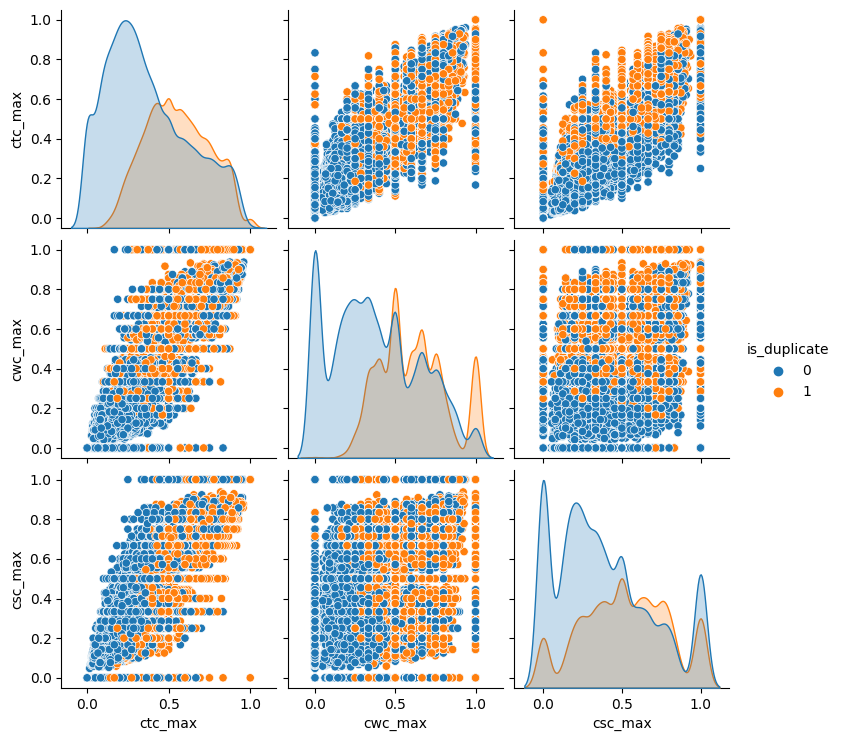

In [33]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')


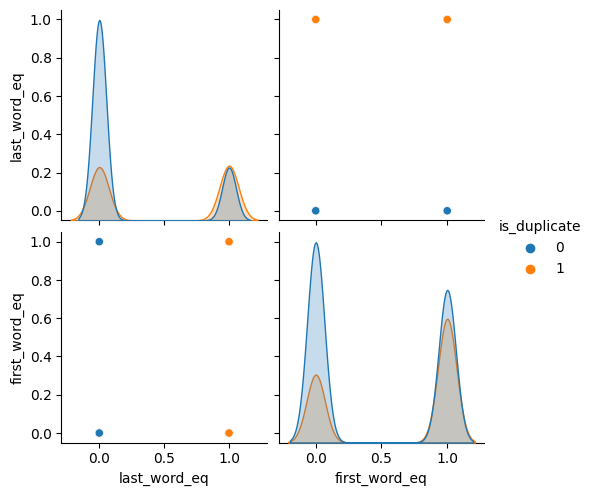

In [34]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')


In [35]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
339499,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry
289521,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...
4665,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...
54203,why did quora mark my question as incomplete,why does quora detect my question as an incomp...
132566,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs


In [36]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()
#I didnt used Fuzzy features

(40000, 19)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,share-word,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
339499,1,57,41,11,8,6,19,0.3158,0.799984,0.666656,0.666644,0.399992,0.749991,0.545450,0.0,1.0,3.0,9.5,0.309524
289521,0,51,104,11,23,3,33,0.0909,0.000000,0.000000,0.499992,0.272725,0.272725,0.136363,0.0,0.0,11.0,16.5,0.115385
4665,0,123,122,42,42,18,38,0.4737,0.923070,0.923070,0.999980,0.999980,0.708330,0.708330,1.0,1.0,0.0,24.0,0.593496
54203,1,44,59,8,10,6,18,0.3333,0.749981,0.599988,0.749981,0.599988,0.749991,0.599994,0.0,1.0,2.0,9.0,0.355556
132566,0,53,39,11,9,6,20,0.3000,0.749981,0.599988,0.599988,0.499992,0.666659,0.545450,0.0,1.0,2.0,10.0,0.400000


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
#merge questions
questions=list(ques_df['question1'])+list(ques_df['question2'])
cv=CountVectorizer(max_features=5000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [38]:
q1_arr 
#bag of words for sentences

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
q2_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape
#10000 col beacuse of bag of words vector,in cv we give max_features=5000

(40000, 10000)

In [41]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()
#19 col added of our feature engineering
#false negative should be less

(40000, 10019)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,share-word,cwc_min,cwc_max,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
339499,1,57,41,11,8,6,19,0.3158,0.799984,0.666656,...,0,0,0,0,0,0,0,0,0,0
289521,0,51,104,11,23,3,33,0.0909,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4665,0,123,122,42,42,18,38,0.4737,0.923070,0.923070,...,0,0,0,0,0,0,0,0,0,0
54203,1,44,59,8,10,6,18,0.3333,0.749981,0.599988,...,0,0,0,0,0,0,0,0,0,0
132566,0,53,39,11,9,6,20,0.3000,0.749981,0.599988,...,0,0,0,0,0,0,0,0,0,0


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.78725

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[4395,  668],
       [1034, 1903]])